<a href="https://colab.research.google.com/github/anish2105/Google-Gemma/blob/main/Gemma_7b_Inferencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Gemma

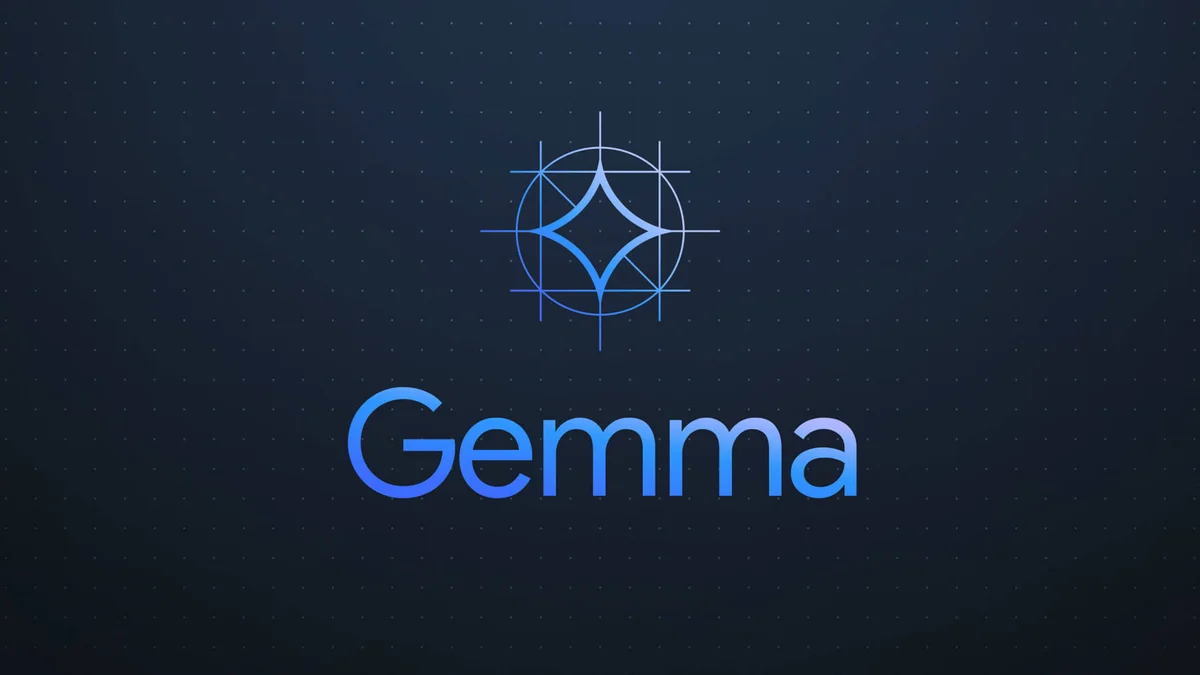



---

Gemma is a family of lightweight, state-of-the-art open models from Google, built from the same research and technology used to create the Gemini models. They are text-to-text, decoder-only large language models, available in English, with open weights, pre-trained variants, and instruction-tuned variants. Gemma models are well-suited for a variety of text generation tasks, including question answering, summarization, and reasoning. Their relatively small size makes it possible to deploy them in environments with limited resources such as a laptop, desktop or your own cloud infrastructure, democratizing access to state of the art AI models and helping foster innovation for everyone.

Gemma Model Card : https://huggingface.co/google/gemma-7b

In [1]:
!pip install git+https://github.com/huggingface/transformers -q peft  accelerate bitsandbytes safetensors sentencepiece

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 7.9 MB/s eta 0:00:00


#### Getting a Hugging Face token
Steps:
1. Navigate to this URL: https://huggingface.co/settings/tokens
2. Create a `write` token and copy it to your clipboard
3. Run the code below and enter your token

In [20]:
#Replace "hf_XXXX" with your huggingface token

from huggingface_hub import login
login("hf_XXXX")

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


**Make sure you have gated access to the model!**

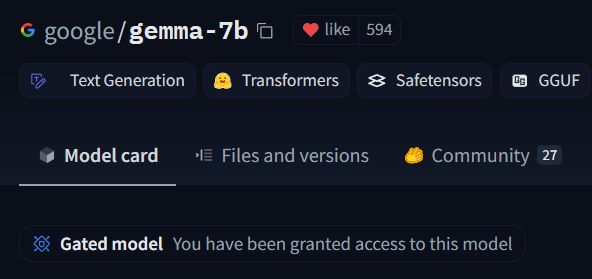

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer , BitsAndBytesConfig
import torch

In [3]:
bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16
    )

In [15]:
model_name = 'google/gemma-7b'

model =  AutoModelForCausalLM.from_pretrained(
  model_name,
  torch_dtype=torch.bfloat16,
  quantization_config=bnb_config,
  device_map='auto'
)

tokenizer = AutoTokenizer.from_pretrained(model_name)

def generate_text(prompt, max_length=500):
    # Encode the input prompt
    input_ids = tokenizer.encode(prompt, return_tensors='pt')

    # Generate a response
    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1)

    # Decode and return the generated text
    return tokenizer.decode(output[0], skip_special_tokens=True)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.11G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

In [21]:
prompt ="""
"Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Tell me about Google.

### Output:
"""
generated_text = generate_text(prompt)
print(generated_text)


"Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Tell me about Google.  

### Output:
Google is a company that provides a search engine and other services.  It is headquartered in California and was founded in 199


#Thank You!!!